In [ ]:
!pip install albumentations==0.4.6

## Cloning Git Repo

In [ ]:
!git clone "https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments.git"

Cloning into 'TheSchoolOfAI-EVA5-Assignments'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 477 (delta 134), reused 97 (delta 35), pack-reused 209
Receiving objects: 100% (477/477), 11.07 MiB | 29.90 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [ ]:
%cd "TheSchoolOfAI-EVA5-Assignments/Assignment 10/src"

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 10/src


## Loading CIFAR-10 Data 

In [ ]:
from data_loader import ImageDataLoader
from data_transform import CIFAR10Transforms
import albumentations as A

In [ ]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [ A.RandomCrop(32, 32, p=0.8),
                     A.Cutout(num_holes=8, max_h_size=10, max_w_size=10, fill_value=0, always_apply=False, p=0.6),
                     A.HorizontalFlip()]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 128, True, 'CIFAR10', figure_size=(20,10))

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Taking a look at the data

#### Train data

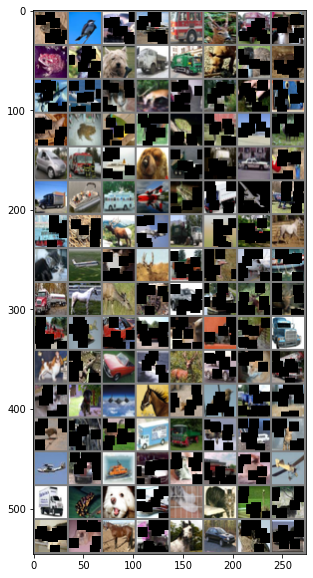

In [ ]:
image_loader.show(dataset_type='train')

#### Test Data

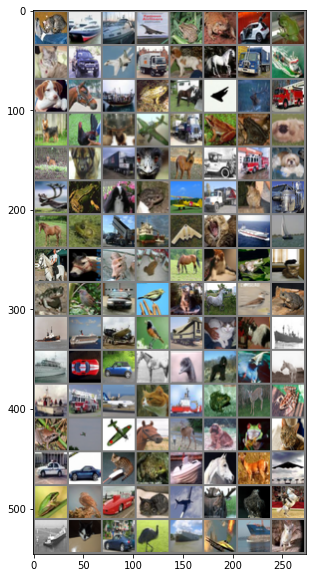

In [ ]:
image_loader.show(dataset_type='test')

## Defining the CNN Learner

Architecture : **(C1|M1|C2|M2|C3|M3|C4|GAP|O)**

Here we are loading our custom Dialated CNN model which has
* 3 Maxpool layers 
* 1 Dialated Convolution Layer
* 1 Depthwise Seperable Convolution Layer





In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from cnn_models import ResNet18
from learner import Learner

In [ ]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=ResNet18(),loss_func=F.cross_entropy)

### Model Summary

In [ ]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Training

In [ ]:
import torch
import torch.optim as optim
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=0.0001, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

In [ ]:
from lr_finder import LRFinder

In [ ]:
criterion=criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(cnn_learner.model, optimizer, criterion, device="cuda" )


Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.26E-02


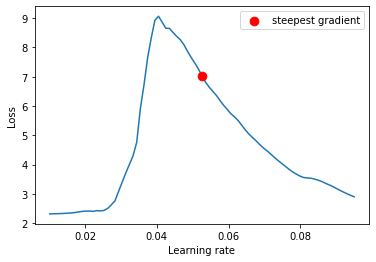

In [ ]:
lr_finder.range_test(train_loader=image_loader.train_loader, val_loader=image_loader.test_loader, end_lr=0.1, num_iter=100, step_mode="linear")
lr_finder.plot(log_lr=False)
lr_finder.reset()

In [ ]:
import torch
import torch.optim as optim
optimizer=optim.SGD(cnn_learner.model.parameters(), lr=5.26e-02, momentum=0.9, weight_decay=cnn_learner.weight_decay)
lr_scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

In [ ]:
cnn_learner.fit_custom(50,optimizer,lr_scheduler,pass_loss=True)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.611501693725586 Batch_id=390 Accuracy=33.43: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4804, Accuracy: 4562/10000 (45.62%)

EPOCH: 1


Loss=1.4328020811080933 Batch_id=390 Accuracy=47.74: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2658, Accuracy: 5375/10000 (53.75%)

EPOCH: 2


Loss=1.2993918657302856 Batch_id=390 Accuracy=55.54: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9624, Accuracy: 6587/10000 (65.87%)

EPOCH: 3


Loss=1.0162550210952759 Batch_id=390 Accuracy=61.28: 100%|██████████| 391/391 [00:34<00:00, 11.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9803, Accuracy: 6583/10000 (65.83%)

EPOCH: 4


Loss=0.9561901092529297 Batch_id=390 Accuracy=66.44: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8134, Accuracy: 7160/10000 (71.60%)

EPOCH: 5


Loss=0.8853163719177246 Batch_id=390 Accuracy=69.39: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7106, Accuracy: 7540/10000 (75.40%)

EPOCH: 6


Loss=0.6110509634017944 Batch_id=390 Accuracy=72.12: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6620, Accuracy: 7725/10000 (77.25%)

EPOCH: 7


Loss=0.7634795904159546 Batch_id=390 Accuracy=74.24: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6522, Accuracy: 7756/10000 (77.56%)

EPOCH: 8


Loss=0.5640254616737366 Batch_id=390 Accuracy=76.14: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6062, Accuracy: 7936/10000 (79.36%)

EPOCH: 9


Loss=0.6091829538345337 Batch_id=390 Accuracy=77.32: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5195, Accuracy: 8226/10000 (82.26%)

EPOCH: 10


Loss=0.5746228694915771 Batch_id=390 Accuracy=78.88: 100%|██████████| 391/391 [00:34<00:00, 11.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5305, Accuracy: 8233/10000 (82.33%)

EPOCH: 11


Loss=0.6946489810943604 Batch_id=390 Accuracy=79.70: 100%|██████████| 391/391 [00:33<00:00, 11.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4680, Accuracy: 8409/10000 (84.09%)

EPOCH: 12


Loss=0.4817342758178711 Batch_id=390 Accuracy=80.76: 100%|██████████| 391/391 [00:34<00:00, 11.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4934, Accuracy: 8361/10000 (83.61%)

EPOCH: 13


Loss=0.3725007176399231 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4632, Accuracy: 8420/10000 (84.20%)

EPOCH: 14


Loss=0.4064597189426422 Batch_id=390 Accuracy=82.60: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5781, Accuracy: 8147/10000 (81.47%)

EPOCH: 15


Loss=0.4124600291252136 Batch_id=390 Accuracy=83.40: 100%|██████████| 391/391 [00:34<00:00, 11.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4495, Accuracy: 8538/10000 (85.38%)

EPOCH: 16


Loss=0.4612438678741455 Batch_id=390 Accuracy=83.97: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4761, Accuracy: 8512/10000 (85.12%)

EPOCH: 17


Loss=0.34785959124565125 Batch_id=390 Accuracy=84.62: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4529, Accuracy: 8551/10000 (85.51%)

EPOCH: 18


Loss=0.42721208930015564 Batch_id=390 Accuracy=85.33: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4880, Accuracy: 8514/10000 (85.14%)

EPOCH: 19


Loss=0.51563560962677 Batch_id=390 Accuracy=86.10: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4535, Accuracy: 8613/10000 (86.13%)

EPOCH: 20


Loss=0.2971072494983673 Batch_id=390 Accuracy=86.46: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4149, Accuracy: 8753/10000 (87.53%)

EPOCH: 21


Loss=0.3275173306465149 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [00:33<00:00, 11.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4412, Accuracy: 8624/10000 (86.24%)

EPOCH: 22


Loss=0.33063390851020813 Batch_id=390 Accuracy=87.63: 100%|██████████| 391/391 [00:33<00:00, 11.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4149, Accuracy: 8742/10000 (87.42%)

EPOCH: 23


Loss=0.6182467937469482 Batch_id=390 Accuracy=87.84: 100%|██████████| 391/391 [00:33<00:00, 11.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4376, Accuracy: 8665/10000 (86.65%)

EPOCH: 24


Loss=0.4910259246826172 Batch_id=390 Accuracy=88.26: 100%|██████████| 391/391 [00:34<00:00, 11.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4543, Accuracy: 8629/10000 (86.29%)

EPOCH: 25


Loss=0.1905161738395691 Batch_id=390 Accuracy=88.82: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4403, Accuracy: 8784/10000 (87.84%)

EPOCH: 26


Loss=0.1489754617214203 Batch_id=390 Accuracy=88.92: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4213, Accuracy: 8778/10000 (87.78%)

EPOCH: 27


Loss=0.30836543440818787 Batch_id=390 Accuracy=89.74: 100%|██████████| 391/391 [00:33<00:00, 11.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4415, Accuracy: 8794/10000 (87.94%)

EPOCH: 28


Loss=0.2399372160434723 Batch_id=390 Accuracy=89.67: 100%|██████████| 391/391 [00:34<00:00, 11.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3969, Accuracy: 8923/10000 (89.23%)

EPOCH: 29


Loss=0.5056341290473938 Batch_id=390 Accuracy=89.82: 100%|██████████| 391/391 [00:34<00:00, 11.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4894, Accuracy: 8648/10000 (86.48%)

EPOCH: 30


Loss=0.28111618757247925 Batch_id=390 Accuracy=90.06: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4509, Accuracy: 8787/10000 (87.87%)

EPOCH: 31


Loss=0.35275620222091675 Batch_id=390 Accuracy=90.61: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4347, Accuracy: 8816/10000 (88.16%)

EPOCH: 32


Loss=0.21137139201164246 Batch_id=390 Accuracy=90.61: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4385, Accuracy: 8809/10000 (88.09%)

EPOCH: 33


Loss=0.2977432608604431 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4388, Accuracy: 8834/10000 (88.34%)

EPOCH: 34


Loss=0.1494385451078415 Batch_id=390 Accuracy=91.36: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4169, Accuracy: 8894/10000 (88.94%)

EPOCH: 35


Loss=0.3582187294960022 Batch_id=390 Accuracy=91.52: 100%|██████████| 391/391 [00:34<00:00, 11.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4168, Accuracy: 8883/10000 (88.83%)

EPOCH: 36


Loss=0.30975791811943054 Batch_id=390 Accuracy=91.80: 100%|██████████| 391/391 [00:33<00:00, 11.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4403, Accuracy: 8912/10000 (89.12%)

EPOCH: 37


Loss=0.24448196589946747 Batch_id=390 Accuracy=91.56: 100%|██████████| 391/391 [00:34<00:00, 11.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4640, Accuracy: 8847/10000 (88.47%)

EPOCH: 38


Loss=0.23858614265918732 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [00:34<00:00, 11.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4113, Accuracy: 8921/10000 (89.21%)

EPOCH: 39


Loss=0.25192826986312866 Batch_id=390 Accuracy=92.15: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4012, Accuracy: 8997/10000 (89.97%)

EPOCH: 40


Loss=0.15125229954719543 Batch_id=390 Accuracy=93.96: 100%|██████████| 391/391 [00:33<00:00, 11.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3807, Accuracy: 9097/10000 (90.97%)

EPOCH: 41


Loss=0.14850181341171265 Batch_id=390 Accuracy=94.35: 100%|██████████| 391/391 [00:34<00:00, 11.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3816, Accuracy: 9088/10000 (90.88%)

EPOCH: 42


Loss=0.18413105607032776 Batch_id=390 Accuracy=94.62: 100%|██████████| 391/391 [00:34<00:00, 11.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3827, Accuracy: 9088/10000 (90.88%)

EPOCH: 43


Loss=0.16423764824867249 Batch_id=390 Accuracy=94.92: 100%|██████████| 391/391 [00:34<00:00, 11.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3929, Accuracy: 9088/10000 (90.88%)

EPOCH: 44


Loss=0.1282254308462143 Batch_id=390 Accuracy=94.99: 100%|██████████| 391/391 [00:34<00:00, 11.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3866, Accuracy: 9111/10000 (91.11%)

EPOCH: 45


Loss=0.13946697115898132 Batch_id=390 Accuracy=95.07: 100%|██████████| 391/391 [00:34<00:00, 11.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3954, Accuracy: 9105/10000 (91.05%)

EPOCH: 46


Loss=0.15335623919963837 Batch_id=390 Accuracy=95.05: 100%|██████████| 391/391 [00:34<00:00, 11.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3846, Accuracy: 9112/10000 (91.12%)

EPOCH: 47


Loss=0.3217570185661316 Batch_id=390 Accuracy=95.21: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3892, Accuracy: 9107/10000 (91.07%)

EPOCH: 48


Loss=0.1604834944009781 Batch_id=390 Accuracy=95.25: 100%|██████████| 391/391 [00:33<00:00, 11.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3935, Accuracy: 9093/10000 (90.93%)

EPOCH: 49


Loss=0.16706687211990356 Batch_id=390 Accuracy=95.27: 100%|██████████| 391/391 [00:33<00:00, 11.61it/s]



Test set: Average loss: 0.3883, Accuracy: 9101/10000 (91.01%)



#### Plot Losses and Accuracy(Train and Test)

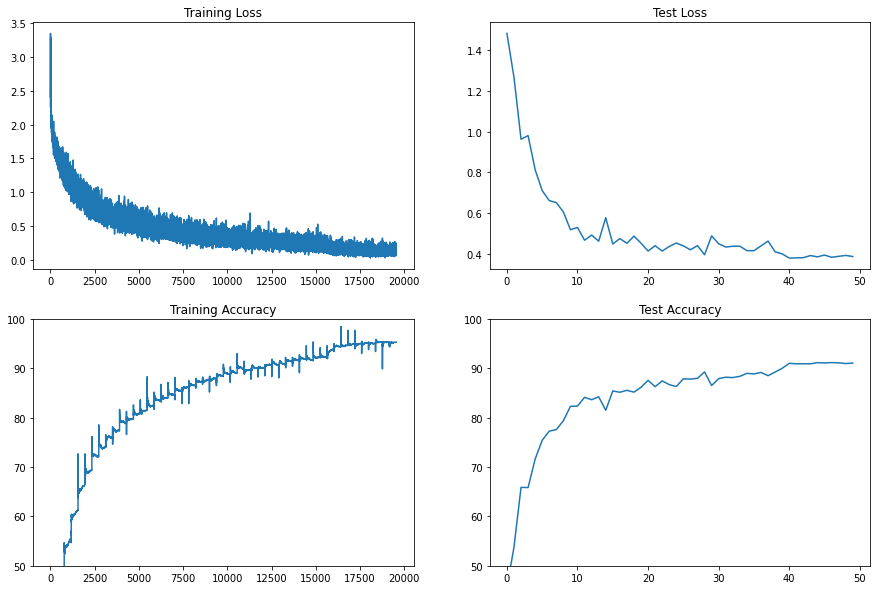

In [ ]:
cnn_learner.plot_losses()

## Interpreting the Learner on Test Data

In [ ]:
from interpreter import Interpreter

In [ ]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 10/src/interpreter.py:39: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = ((predicted == labels) == False).nonzero()


#### Confusion Matrix

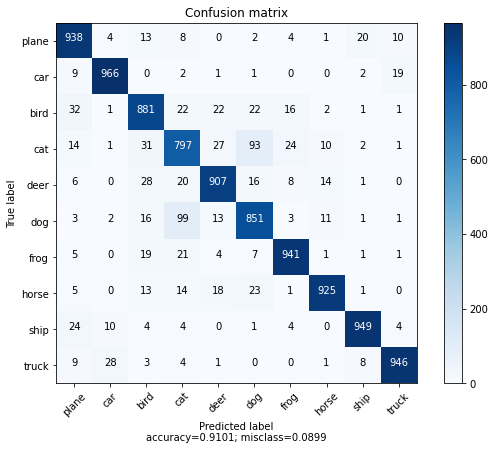

In [ ]:
intrepret.plot_confusion_matrix()

#### Performance Metrics
Here we see the Precision, Recall, F1-Score

In [ ]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.874008,0.8810,0.877490,1000.0000
car,0.954545,0.9660,0.960239,1000.0000
bird,0.804238,0.7970,0.800603,1000.0000
cat,0.913394,0.9070,0.910186,1000.0000
deer,0.837598,0.8510,0.844246,1000.0000
dog,0.940060,0.9410,0.940530,1000.0000
frog,0.958549,0.9250,0.941476,1000.0000
horse,0.897608,0.9380,0.917359,1000.0000
ship,0.962475,0.9490,0.955690,1000.0000
truck,0.962360,0.9460,0.954110,1000.0000


#### Misclassifications
Visualizing 50 Misclassifications


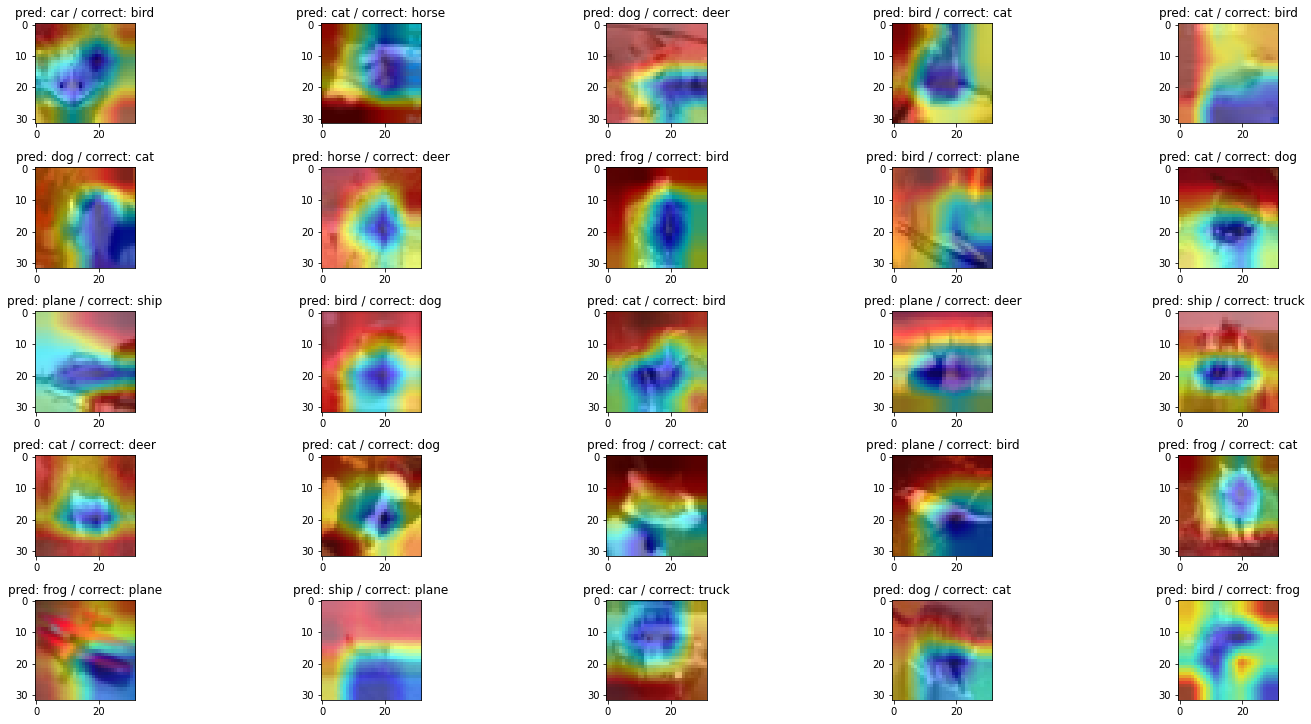

In [ ]:
intrepret.show_misclassifications(k=25,gradcam=True)